In [1]:
import gempy as gp
import jinja2
import ipyvtklink

No module named 'osgeo'
Not subsurface compatibility available


In [2]:
import numpy as np
%matplotlib inline

In [3]:
extent = (-5., 1005., -5., 1005., -1005., 5.)
shape = (101, 101, 101)

geo_model = gp.create_model('Gempy-tutorial')
geo_model = gp.init_data(geo_model, extent=extent, resolution=shape)

Active grids: ['regular']


In [4]:
gp.set_interpolator(geo_model, output=['geology'], theano_optimizer='fast_compile')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range             1749.371316
$C_o$            72864.285714
drift equations           [3]


In [5]:
geo_model.rename_series({'Default series': 'Lower'})

In [6]:
geo_model.add_surfaces(['co2', 'sands', 'lowershale'])

,surface,series,order_surfaces,color,id
0,co2,Lower,1,#015482,1
1,sands,Lower,2,#9f0052,2
2,lowershale,Lower,3,#ffbe00,3


In [7]:
def create_surface(model, points, surface):
    """Add a list of points to a surface in a model"""
    xyz = ('X', 'Y', 'Z')
    for point in points:
        kwargs = {**dict(zip(xyz, point)), 'surface': surface}
        model.add_surface_points(**kwargs)

# The points defining the base of the sand layer
sand_points = [(322, 135, -783), (635, 702, -791), (221, 668, -772), (732, 235, -801), (442, 454, -702)]

# Call our function
create_surface(geo_model, sand_points, 'sands')

# Add the surface orientation
geo_model.add_orientations(X=442., Y=495., Z=-752.,
                           surface='sands', pole_vector=(0.05, 0.05, 0.95))

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,442.0,495.0,-752.0,0.05,0.05,0.95,0.01,sands


In [8]:
# Points defining the base of the CO2 layer
co2_points = [(322, 135, -650), (635, 702, -650), (221, 668, -650), (732, 235, -650), (442, 454, -650)]

create_surface(geo_model, co2_points, 'co2')

# Add the surface orientation
geo_model.add_orientations(X=495., Y=495., Z=-650.,
                           surface='co2', pole_vector=(0., 0., 1.))

,X,Y,Z,G_x,G_y,G_z,smooth,surface
1,495.0,495.0,-650.0,0.00,0.00,1.00,0.01,co2
0,442.0,495.0,-752.0,0.05,0.05,0.95,0.01,sands


In [9]:
geo_model.add_series('Upper')

,order_series,BottomRelation,isActive,isFault,isFinite
Lower,1,Erosion,True,False,False
Upper,2,Erosion,False,False,False


In [10]:
geo_model.reorder_series(['Upper', 'Lower'])

,order_series,BottomRelation,isActive,isFault,isFinite
Upper,1,Erosion,False,False,False
Lower,2,Erosion,True,False,False


In [11]:
geo_model.add_surfaces(['water', 'sediments', 'uppershale'])

,surface,series,order_surfaces,color,id
0,co2,Lower,1,#015482,1
1,sands,Lower,2,#9f0052,2
2,lowershale,Lower,3,#ffbe00,3
3,water,Lower,4,#728f02,4
4,sediments,Lower,5,#443988,5
5,uppershale,Lower,6,#ff3f20,6


In [12]:
gp.map_stack_to_surfaces(geo_model, {'Upper': ('water', 'sediments', 'uppershale')})

,surface,series,order_surfaces,color,id
3,water,Upper,1,#728f02,1
4,sediments,Upper,2,#443988,2
5,uppershale,Upper,3,#ff3f20,3
0,co2,Lower,1,#015482,4
1,sands,Lower,2,#9f0052,5
2,lowershale,Lower,3,#ffbe00,6


In [13]:
uppershale_points = [(322, 135, -633), (635, 702, -641), (221, 668, -622), (732, 235, -651), (442, 454, -552)]
sediments_points = [(322, 135, -433), (635, 702, -441), (221, 668, -422), (732, 235, -451), (442, 454, -352)]
water_points = [(232, 153, -221), (653, 234, -216), (112, 872, -198), (532, 572, -223),
                (722, 884, -189), (632, 429, -201), (732, 348, -222)]

# Add the points to our surfaces
create_surface(geo_model, uppershale_points, 'uppershale')
create_surface(geo_model, sediments_points, 'sediments')
create_surface(geo_model, water_points, 'water')

# Set an orientation
geo_model.add_orientations(X=442., Y=495., Z=-502.,
                           surface='uppershale', pole_vector=(0.05, 0.05, 0.95))

,X,Y,Z,G_x,G_y,G_z,smooth,surface
2,442.0,495.0,-502.0,0.05,0.05,0.95,0.01,uppershale
1,495.0,495.0,-650.0,0.00,0.00,1.00,0.01,co2
0,442.0,495.0,-752.0,0.05,0.05,0.95,0.01,sands


In [14]:
geo_model.add_surface_values([1.5, 1.75, 2.5, 1.1, 2., 2.5], ['vp'])
geo_model.surfaces

,surface,series,order_surfaces,color,id,vp
3,water,Upper,1,#728f02,1,1.500000
4,sediments,Upper,2,#443988,2,1.750000
5,uppershale,Upper,3,#ff3f20,3,2.500000
0,co2,Lower,1,#015482,4,1.100000
1,sands,Lower,2,#9f0052,5,2.000000
2,lowershale,Lower,3,#ffbe00,6,2.500000


In [15]:
sol = gp.compute_model(geo_model)

In [16]:
p3d = gp.plot_3d(geo_model, plotter_type='background', notebook=True)
# Plot data points and orientations
p3d.plot_data()

# Plot the surfaces
p3d.plot_surfaces()
# Plot the lithological units
p3d.plot_structured_grid('lith')

/home/manuel/anaconda3/lib/python3.9/site-packages/pyvista/plotting/tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(


[StructuredGrid (0x7f626ac82640)
   N Cells:	1000000
   N Points:	1030301
   X Bounds:	0.000e+00, 1.000e+03
   Y Bounds:	0.000e+00, 1.000e+03
   Z Bounds:	-1.000e+03, 0.000e+00
   Dimensions:	101, 101, 101
   N Arrays:	1,

In [17]:
sol.values_matrix

array([[2.5       , 2.44720385, 2.        , ..., 1.5       , 1.5       ,
        1.5       ]])

In [18]:
reshaped = np.reshape(sol.values_matrix, shape, order='C')
reshaped.shape

(101, 101, 101)

In [19]:
np.save("MODELO3D_FINAL_1",reshaped)

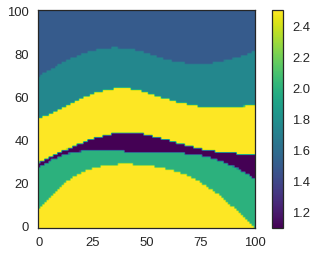

In [20]:
import matplotlib.pyplot as plt

# Take the center slice in the x direction
# Remember that in Devito, indexing convention is [x, y, z] (need to flip for correct imshow display)
plt.imshow(reshaped[50].T, cmap='viridis', origin='lower')
plt.colorbar()
plt.show()

In [21]:
import devito as dv
from examples.seismic import Model

In [22]:
seis_model = Model(vp=reshaped, origin=(0., 0., -1000.), spacing=(10., 10., 10.), shape=shape, nbl=30, space_order=4, bcs="damp")

Operator `initdamp` ran in 0.02 s
Operator `pad_vp` ran in 0.01 s


In [23]:
from examples.seismic import TimeAxis

t0 = 0.  # Simulation starts a t=0
tn = 1000.  # Simulation last 1 second (1000 ms)
dt = seis_model.critical_dt  # Time step from model grid spacing

time_range = TimeAxis(start=t0, stop=tn, step=dt)

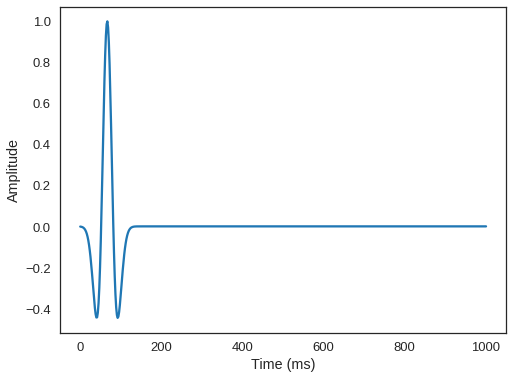

[[500. 500. -20.]]


In [1007]:
from examples.seismic import RickerSource

f0 = 0.015  # Source peak frequency is 15Hz (0.015 kHz)
src = RickerSource(name='src', grid=seis_model.grid, f0=f0,
                   npoint=1, time_range=time_range)

# First, position source centrally in all dimensions, then set depth

src.coordinates.data[:,0] = 500
src.coordinates.data[:,1] = 500
src.coordinates.data[0, -1] = -20  # Depth is 20m
src.show()
print(src.coordinates.data)

In [1008]:
src.coordinates.data

Data([[500., 500., -20.]], dtype=float32)

In [1009]:
from examples.seismic import Receiver

# Create symbol for 101 receivers
rec = Receiver(name='rec', grid=seis_model.grid, npoint=101, time_range=time_range)

# Prescribe even spacing for receivers along the x-axis
rec.coordinates.data[:, 0] = np.linspace(0, seis_model.domain_size[0], num=101)
rec.coordinates.data[:, 1] = 0.5*seis_model.domain_size[1]
rec.coordinates.data[:, -1] = -20.  # Depth is 20m

In [1010]:
u = dv.TimeFunction(name="u", grid=seis_model.grid, time_order=2, space_order=4)

# We can now write the PDE
pde = seis_model.m * u.dt2 - u.laplace + seis_model.damp * u.dt

# The PDE representation is as on paper
pde

damp(x, y, z)*Derivative(u(t, x, y, z), t) - Derivative(u(t, x, y, z), (x, 2)) - Derivative(u(t, x, y, z), (y, 2)) - Derivative(u(t, x, y, z), (z, 2)) + Derivative(u(t, x, y, z), (t, 2))/vp(x, y, z)**2

In [1011]:
stencil = dv.Eq(u.forward, dv.solve(pde, u.forward))
stencil

Eq(u(t + dt, x, y, z), (-(-2.0*u(t, x, y, z)/dt**2 + u(t - dt, x, y, z)/dt**2)/vp(x, y, z)**2 + Derivative(u(t, x, y, z), (x, 2)) + Derivative(u(t, x, y, z), (y, 2)) + Derivative(u(t, x, y, z), (z, 2)) + damp(x, y, z)*u(t, x, y, z)/dt)/(damp(x, y, z)/dt + 1/(dt**2*vp(x, y, z)**2)))

In [1012]:
src_term = src.inject(field=u.forward, expr=src * dt**2 / seis_model.m)

# Create interpolation expression for receivers
rec_term = rec.interpolate(expr=u.forward)

In [1013]:
op = dv.Operator([stencil] + src_term + rec_term, subs=seis_model.spacing_map)

In [1014]:
op(time=time_range.num-1, dt=seis_model.critical_dt)

Operator `Kernel` ran in 5.31 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=5.290535999999995, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section1', rank=None),
                     PerfEntry(time=0.0005970000000000062, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section2', rank=None),
                     PerfEntry(time=0.014187000000000026, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

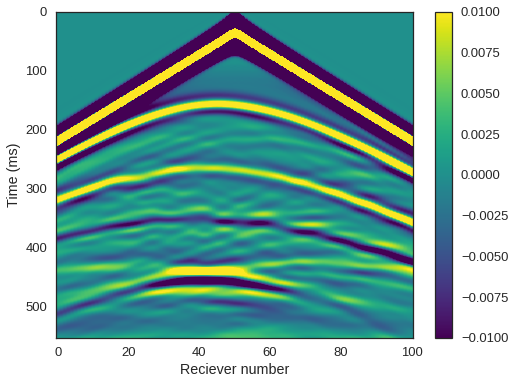

In [1015]:
plt.imshow(rec.data, cmap='viridis', aspect='auto', vmax=0.01, vmin=-0.01)
plt.xlabel("Reciever number")
plt.ylabel("Time (ms)")
plt.colorbar()
plt.show()